# Get base64 representations of emojis, convert to .png files.

In [1]:
import base64
import imageio
import os
import numpy as np
from IPython.display import Image as ipyimage
import matplotlib.pyplot as plt
import requests

from PIL import Image
from bs4 import BeautifulSoup as Soup

In [2]:
# All of the emojis.
emoji_URL = "https://unicode.org/emoji/charts/full-emoji-list.html"  # lines 1 - 116
person_URL = "https://unicode.org/emoji/charts/full-emoji-modifiers.html"  # lines 196 - 1160. whoa.

In [3]:
# strip transparency dimension (because RGB channels are crazy in transparencent spaces)
def strip_transparency(i):
    px_transparent = i[:, :, 3] < 0.1
    i[px_transparent, 0:3] = 1
    i = i[:, :, 0:3]
    return i

In [4]:
def get_raw_emoji(URL):
    request = requests.get(URL)
    soup = Soup(request.text, 'html.parser')
    tags = soup.find_all(name='tr',)
    keepers = [tag for tag in tags if tag.td and int(tag.td.text) in range(1, 117)]
    keeper_soup = [keeper.find_all(name='img') for keeper in keepers]
    all_pngs = []
    for png_list in keeper_soup:
        for png in png_list:
            all_pngs.append(png)
    png64_encoded = [png64_['src'].split(',')[1].encode() for png64_ in all_pngs]
    png64_decoded =[base64.decodebytes(png64) for png64 in png64_encoded]
    for i, png64 in enumerate(png64_decoded):
        with open(f'emoji_{i}.png', 'wb') as f:
            f.write(png64)

In [33]:
def strip_emoji():
    for emoji in os.listdir('.'):
#         with open(emoji, 'rb') as f:
#             image_file = f.read()
        try:
            image = np.asarray(imageio.imread(emoji))
            stripped_face = strip_transparency(image)
        except IndexError as e:
            print(e)
            print(emoji)
            continue
        array_face = np.asarray(stripped_face)
        imageio.imwrite(f'../stripped_emoji/{emoji}', array_face, 'png')

In [34]:
def resize_emoji():
    for emoji in os.listdir('../stripped_emoji'):
        image = Image.open(f'../stripped_emoji/{emoji}')
        resized_image = image.resize((36, 36), Image.ANTIALIAS)
        np_image = np.asarray(resized_image)
        imageio.imwrite(f'../final_emoji/{emoji}', np_image, 'png')

In [35]:
get_raw_emoji(emoji_URL)

In [36]:
strip_emoji()

too many indices for array
emoji_790.png
too many indices for array
emoji_788.png


In [37]:
resize_emoji()

In [38]:
new_emoji = imageio.imread('../final_emoji/emoji_104.png')

(-0.5, 35.5, 35.5, -0.5)

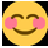

In [39]:
fig = plt.figure(dpi=15)
ax = fig.gca()
ax.imshow(new_emoji, interpolation='nearest')
ax.axis('off')
